# HW4 - Pandas exercises

We open with some imports as usual - some of these will be unfamiliar, but bear with me

In [1]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Some helpful functions 
just use these as be and don't worry too much about about them for now, we will learn how they work soon

In [4]:
# Same data manipulation to get USGS streamflow as
# a pandas dataframe as before
def create_usgs_url(site_no, begin_date, end_date):
    return (
        f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}'
    )

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response,
        comment='#',
        skipfooter=1,
        delim_whitespace=True,
        names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
        index_col=2,
        parse_dates=True
    ).iloc[2:]

    # Now convert the streamflow data to floats and
    # the index to datetimes. When processing raw data
    # it's common to have to do some extra postprocessing
    df['streamflow'] = df['streamflow'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df

def open_daymet_data(lat, lon, begin_date, end_date):
    args = {'lat':  lat, 'lon': lon, 'format': 'csv',
            'start': begin_date, 'end': end_date}
    query = urllib.parse.urlencode(args)
    url = f"https://daymet.ornl.gov/single-pixel/api/data?{query}"
    response = urllib.request.urlopen(url)
    df = pd.read_csv(response, header=6)
    datestring = (df['year'].astype(str) + df['yday'].astype(str))
    dates = pd.to_datetime(datestring, format='%Y%j')
    df.index = pd.DatetimeIndex(dates)
    return df

# Additionally, setting some "metadata" - this will become second nature soon

In [5]:
site = '09506000'
begin_date = '1992-09-25'
end_date = '2022-09-25'
lat = 34.4483605
lon = -111.7898705

# Now open up some datasets from the above commands, you are almost to your exercises

In [6]:
verde_df = open_daymet_data(lat, lon, begin_date, end_date)
usgs_df = open_usgs_data(site, begin_date, end_date)
verde_df = verde_df.reindex(verde_df.index)
verde_df['streamflow'] = usgs_df['streamflow']
verde_df.head()

/tmp/ipykernel_4604/3469173433.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(
/tmp/ipykernel_4604/3469173433.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(
/tmp/ipykernel_4604/3469173433.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_table(


,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
1992-09-25,1992,269,42469.79,0.0,413.81,0.0,33.57,12.92,1489.09,129.0
1992-09-26,1992,270,42337.25,0.0,419.69,0.0,34.03,12.61,1459.42,121.0
1992-09-27,1992,271,42204.86,0.0,436.54,0.0,34.89,11.41,1348.48,122.0
1992-09-28,1992,272,42072.64,0.0,421.55,0.0,35.44,12.82,1479.16,127.0
1992-09-29,1992,273,41940.63,0.0,380.67,0.0,33.42,14.18,1616.07,120.0


# 1. How do you see a quick summary of what is in `verde_df`?

In [17]:
print(verde_df.index)
verde_df.info
verde_df.head()

DatetimeIndex(['1992-09-25', '1992-09-26', '1992-09-27', '1992-09-28',
               '1992-09-29', '1992-09-30', '1992-10-01', '1992-10-02',
               '1992-10-03', '1992-10-04',
               ...
               '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19',
               '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23',
               '2022-09-24', '2022-09-25'],
              dtype='datetime64[ns]', length=10950, freq=None)


,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
1992-09-25,1992,269,42469.79,0.0,413.81,0.0,33.57,12.92,1489.09,129.0
1992-09-26,1992,270,42337.25,0.0,419.69,0.0,34.03,12.61,1459.42,121.0
1992-09-27,1992,271,42204.86,0.0,436.54,0.0,34.89,11.41,1348.48,122.0
1992-09-28,1992,272,42072.64,0.0,421.55,0.0,35.44,12.82,1479.16,127.0
1992-09-29,1992,273,41940.63,0.0,380.67,0.0,33.42,14.18,1616.07,120.0


# 1. How do you get a listing of the columns in `verde_df`?

In [13]:
verde_df.columns

Index(['year', 'yday', 'dayl (s)', 'prcp (mm/day)', 'srad (W/m^2)',
       'swe (kg/m^2)', 'tmax (deg c)', 'tmin (deg c)', 'vp (Pa)',
       'streamflow'],
      dtype='object')

# 2. How do you select the streamflow column in `verde_df`?

In [ ]:
verde_df.yday #gives column and index
verde_df['vp (Pa)'] #another way to view column and index 
verde_df['vp (Pa)'].tolist() #gives you just the contents of the column

[1489.09,
 1459.42,
 1348.48,
 1479.16,
 1616.07,
 1357.33,
 1205.36,
 1160.56,
 1126.35,
 1105.48,
 1092.85,
 1061.4,
 952.75,
 879.77,
 889.22,
 957.0,
 1051.92,
 1101.15,
 1164.25,
 1011.61,
 1027.13,
 941.8,
 973.22,
 1082.95,
 1151.79,
 1007.05,
 1076.26,
 1157.62,
 1306.68,
 1411.44,
 1134.87,
 1056.2,
 1157.56,
 1265.98,
 1193.14,
 927.22,
 979.46,
 817.48,
 816.15,
 852.72,
 655.13,
 610.47,
 611.71,
 625.46,
 624.92,
 703.36,
 678.68,
 581.61,
 533.05,
 602.83,
 636.61,
 685.78,
 746.5,
 641.23,
 638.28,
 609.79,
 744.03,
 445.03,
 365.03,
 492.54,
 301.1,
 258.33,
 263.93,
 258.83,
 246.04,
 293.96,
 291.83,
 249.06,
 238.39,
 471.45,
 819.02,
 783.13,
 526.44,
 553.61,
 632.59,
 766.46,
 594.74,
 590.45,
 619.97,
 544.94,
 504.54,
 408.75,
 440.89,
 449.69,
 457.76,
 499.01,
 401.26,
 458.66,
 473.05,
 499.87,
 506.73,
 531.82,
 509.14,
 469.9,
 687.2,
 1037.57,
 965.16,
 644.18,
 698.33,
 690.29,
 475.2,
 555.13,
 810.09,
 913.11,
 1060.02,
 750.25,
 834.45,
 744.55,
 535.7

# 3. How do you plot the streamflow in `verde_df`?

Text(0, 0.5, 'Streamflow (cfs)')

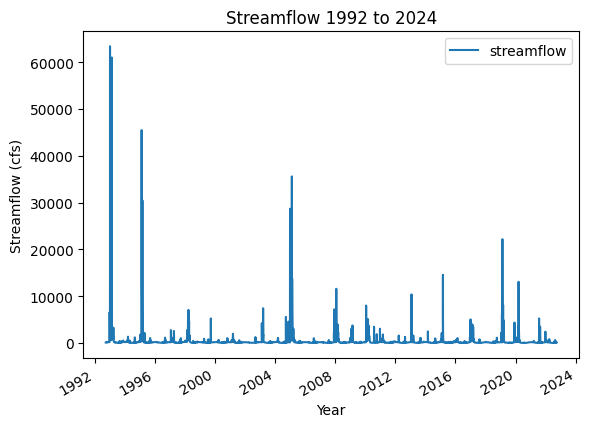

In [49]:
verde_df['streamflow'].plot()
plt.legend()
plt.title("Streamflow 1992 to 2024")
plt.xlabel("Year")
plt.ylabel("Streamflow (cfs)")

In [62]:
verde_df['streamflow'] 
yearly_mean = verde_df.groupby(verde_df.index.year).mean()
yearly_mean.head()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
1992,1992.0,317.0,37446.313196,1.689175,294.319897,0.0,20.729485,2.919072,780.239691,325.628866
1993,1993.0,183.0,43200.097836,1.793205,386.747836,0.0,25.972740,8.082712,827.084685,1367.600000
1994,1994.0,183.0,43200.097836,1.013068,390.755753,0.0,26.702000,7.903644,758.578849,198.186301
1995,1995.0,183.0,43200.097836,1.315808,389.309479,0.0,26.762932,8.186192,864.790438,696.832877
1996,1996.0,183.0,43200.097836,0.837096,393.365918,0.0,27.671836,8.436082,736.011726,161.800000


In [ ]:
#alternative: resample method 
    #Resample is used to change the frequency of time series data
    #It groups the data by a new time period (like year, month, week, etc.) and then applies an aggregation function (like mean, sum, max, etc.) to each group.

yearly_mean2 = verde_df['streamflow'].resample('A').mean() #where A indicates annual
print(yearly_mean2)
#gives same answer!

1992-12-31     325.628866
1993-12-31    1367.600000
1994-12-31     198.186301
1995-12-31     696.832877
1996-12-31     161.800000
1997-12-31     259.210959
1998-12-31     512.495890
1999-12-31     208.290411
2000-12-31     164.849315
2001-12-31     216.185753
2002-12-31     138.436164
2003-12-31     275.321370
2004-12-31     357.517260
2005-12-31     945.289315
2006-12-31     151.269589
2007-12-31     179.529315
2008-12-31     413.069589
2009-12-31     210.273699
2010-12-31     513.506301
2011-12-31     208.901370
2012-12-31     158.804110
2013-12-31     247.320822
2014-12-31     167.870685
2015-12-31     275.137260
2016-12-31     216.627671
2017-12-31     445.721370
2018-12-31     151.464110
2019-12-31     533.378630
2020-12-31     309.961096
2021-12-31     209.540000
2022-12-31     167.891011
Freq: YE-DEC, Name: streamflow, dtype: float64


/tmp/ipykernel_4604/1011047008.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean2 = verde_df['streamflow'].resample('A').mean() #where A indicates annual


Text(0, 0.5, 'Streamflow (cfs)')

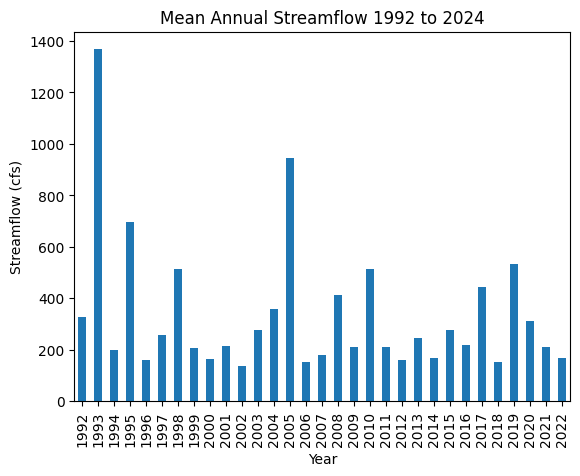

In [47]:
yearly_mean['streamflow'].plot.bar()
plt.title("Mean Annual Streamflow 1992 to 2024")
plt.xlabel("Year")
plt.ylabel("Streamflow (cfs)")

# 5. How do you get the last streamflow value from `verde_df`?

In [ ]:
verde_df['streamflow'].tail()

2022-09-21    111.0
2022-09-22    147.0
2022-09-23    190.0
2022-09-24    166.0
2022-09-25      NaN
Name: streamflow, dtype: float64

# 4. What is the mean streamflow value for the 30 year period?

In [ ]:
verde_df['streamflow'].mean()
verde_df['streamflow'].mean().item() #gives value only

336.82214814138274

# 5. What is the maximum value for the 30 year period?


In [ ]:
#is it true? it's truely what the model says
#STOPPED HERE



#verde_df['streamflow'].max()
#wow that is VERY high

#yearly_mean2 = verde_df['streamflow'].resample('A').mean() #where A indicates annual
#print(yearly_mean2)



np.float64(63400.0)

# 6. How do you find the maximum streamflow value for each year?

In [ ]:
verde_df['streamflow'] 
    #alternative: resample command would also work but unclear what A means
    #verde_df['streamflow].resample('A').mean().plot()

yearly_mean = verde_df.groupby(verde_df.index.year).max()
yearly_mean.head()

# 7. How do you make a scatter plot of `dayl (s)` versus `tmax (deg c)`?
#### INFO: `dayl` is the day length in seconds and `tmax` is the daily maximum temperature

In [ ]:
# TODO: your code here

# 8. How do you calculate (and plot) the mean daily minimum temperature for each day of year?  And plot it?
#### INFO: Daily minimum temperature is in the column `tmin (deg c)`

In [ ]:
# TODO: your code here

# 11. What is the average value of all columns for October 10 across all years?
#### INFO: October 10 is the 283rd day of year

In [ ]:
# TODO: your code here

# NEW DATASET : Iris
Loading data - here I provide a dataset for you
to work with for the first set of exercises

The iris dataset is a classic and very easy 
multi-class classification dataset. It describes
measurments of sepal & petal width/length for three
different species of iris

In [ ]:
d = load_iris()
iris_df = pd.DataFrame(d['data'], columns=d['feature_names'])
iris_df.index = pd.Series(
    pd.Categorical.from_codes(d.target, d.target_names),
    name='species'
)
iris_df.head()

# 12. How do you view the "unique" species in the `iris_df` index?


In [ ]:
# TODO: your code here

# 13. How do you "locate" only rows for the `versicolor` species?

In [ ]:
# TODO: your code here

# 14. How do you group by the 3 different species and take the mean across the whole dataframe?

In [ ]:
# TODO: your code here

# 15. How do you make a scatter plot of the `sepal length (cm)` versus the `petal length (cm)` for the `versicolor`` species?

In [ ]:
# TODO: your code here

# BONUS OPTION: 
 Do the same plot for `setosa` and `virginica` all on the same figure. Color them 'tomato', 'darkcyan', and 'darkviolet', respectively.  Worth 1 point extra credit


In [ ]:
# TODO: your code here